## **Prueba de ingreso a OCR**

Eres contratado/a como **científico/a de datos** por una empresa especializada en **reconocimiento óptico de caracteres (OCR)**, propiedad de Juanpis, para mejorar su sistema de digitalización de documentos manuscritos. Aunque el modelo de OCR actual ha sido optimizado con grandes volúmenes de datos, aún enfrenta **problemas en la diferenciación de ciertos dígitos escritos a mano**, especialmente aquellos con trazos similares, como **"1" y "7"**, **"3" y "8"**, o **"5" y "6"**.

Estos errores de clasificación pueden generar problemas significativos en la conversión de documentos físicos a texto digital, impactando áreas clave como:
- **Contabilidad y Finanzas:** Errores en el reconocimiento de montos numéricos pueden causar discrepancias en balances financieros.
- **Seguridad y Autenticación:** Fallos en la lectura de códigos de seguridad o contraseñas pueden comprometer sistemas de acceso.
- **Automatización de Documentos:** Formularios mal digitalizados pueden llevar a registros erróneos en bases de datos oficiales.

Consciente de la importancia de mejorar la precisión del sistema, decides realizar un análisis para visualizar **cómo se distribuyen los dígitos manuscritos en un espacio de menor dimensión**. Esta exploración permitirá a la empresa tomar decisiones informadas sobre qué enfoques mejorarían el rendimiento del OCR. Para ello, propones comparar tres técnicas de reducción de dimensionalidad:

- **PCA (Análisis de Componentes Principales):** Un método lineal que encuentra las direcciones de mayor varianza en los datos, útil para visualizar estructuras globales.
- **t-SNE (t-Distributed Stochastic Neighbor Embedding):** Un enfoque no lineal que preserva relaciones locales y es efectivo para descubrir agrupaciones naturales.
- **UMAP (Uniform Manifold Approximation and Projection):** Una técnica más reciente que combina ventajas de PCA y t-SNE, preservando tanto la estructura local como global.

Tu objetivo es determinar **qué técnica de reducción de dimensionalidad permite visualizar mejor la estructura de los dígitos y su separación**, ayudando a identificar patrones que puedan mejorar la precisión del OCR en escenarios reales.

### **Preguntas**
1. ¿Cómo se diferencian los resultados de PCA, t-SNE y UMAP en la representación de los dígitos?  
2. ¿Cuál de estas técnicas parece agrupar mejor los números similares? ¿Por qué?  
3. ¿Cómo podrías interpretar las agrupaciones formadas en cada método? ¿Existen dígitos que se solapan en ciertas técnicas?  
4. ¿Qué impacto podría tener la selección de la técnica de reducción de dimensionalidad en la eficiencia del sistema OCR?  
5. ¿Crees que la escala de los datos afecta los resultados de estas técnicas? ¿Cómo podrías comprobarlo?  
6. ¿Es necesario escalar los datos antes de aplicar PCA, t-SNE y UMAP? ¿Por qué o en qué casos sí o no?  
7. Juanpis tiene curiosidad sobre cómo funcionan PCA, t-SNE y UMAP. ¿Cómo le explicarías de forma corta y concisa las diferencias clave entre estas técnicas?  
8. Si tuvieras que presentar estos hallazgos a un equipo de desarrollo de OCR, ¿cómo los explicarías en términos de negocio?  
9. ¿Cómo podrías extender este análisis para mejorar el reconocimiento de caracteres en alfabetos distintos al latino?
10. Como parte del proceso de validación de autoría, la empresa verifica que cada desarrollador comprenda a fondo el código, pudiendo adaptarlo y modificarlo según los requerimientos del negocio. Para garantizar esto, el equipo de revisión técnica, liderado por Albert, realizará una serie de preguntas y pruebas destinadas a evaluar tu dominio sobre el código, su propósito y su implementación. Deberás estar preparado para justificar cada decisión tomada en el desarrollo  
11. ¿Cuál de estas técnicas es más adecuada para grandes volúmenes de datos y por qué?  
12. ¿Cuál de estas técnicas es más sensible a los parámetros de configuración? ¿Cómo impacta esto en la visualización de los datos?  
13. ¿Cómo afecta la distancia entre puntos en cada uno de estos métodos? ¿Se conserva la misma interpretación entre PCA y t-SNE/UMAP?  
14. ¿En qué escenarios t-SNE podría no ser una buena opción para visualizar datos?  
15. ¿Cómo afecta el hiperparámetro *perplexity* en t-SNE? ¿Cómo se selecciona un valor adecuado?  
16. UMAP utiliza un parámetro llamado *n_neighbors*. ¿Cómo influye en los resultados y qué ocurre si se elige un valor demasiado bajo o demasiado alto?  
17. ¿Cómo se comparan las curvas de tiempo de ejecución de PCA, t-SNE y UMAP en conjuntos de datos grandes?  
18. ¿Cómo podría usarse la reducción de dimensionalidad en la preprocesamiento de imágenes antes del OCR?  
19. ¿Cómo podríamos evaluar si una técnica de reducción de dimensionalidad mejora realmente el rendimiento del OCR?  
20. ¿Podría la reducción de dimensionalidad ayudar en la detección de anomalías en el OCR? ¿Cómo?  
21. ¿Cómo podríamos utilizar estas técnicas para detectar caracteres fuera del conjunto de entrenamiento del OCR?  
22. ¿Qué otros métodos podrían ayudar a mejorar la precisión del OCR además de la reducción de dimensionalidad?  
23. ¿En qué otras áreas del aprendizaje automático se utilizan PCA, t-SNE y UMAP?  
24. ¿Cómo podrías aplicar reducción de dimensionalidad en sistemas de recomendación o análisis de texto?  
25. ¿Cómo se puede combinar reducción de dimensionalidad con clustering para segmentación de clientes?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import umap.umap_ as umap
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

In [3]:
# Cargar el conjunto de datos MNIST
data = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = data.data, data.target.astype(int)

In [4]:
from sklearn.utils import shuffle
X_subset, y_subset = shuffle(X, y, random_state=42, n_samples=15000)

In [5]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Reducción de dimensionalidad con UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42, min_dist=0.005,n_neighbors=10,)
X_umap = umap_reducer.fit_transform(X_scaled)

c:\Users\diego\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
# Reducción de dimensionalidad con t-SNE
#perplexity=30.0, early_exaggeration=12.0, metric='euclidean', init = "pca" 

tsne = TSNE(n_components=2, random_state=42, perplexity=10)
X_tsne = tsne.fit_transform(X_subset)

In [ ]:
# Función para graficar los resultados
def plot_embedding(X_embedded, y, title):
    plt.figure(figsize=(12, 6))
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='tab10', alpha=0.6, s=5)
    plt.colorbar(scatter, label="Dígitos")
    plt.title(title)
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.show()

In [18]:
import plotly.graph_objects as go
from itertools import product
import numpy as np

n_neighbors_list = [5, 10, 20]
min_dist_list = [0.001, 0.01, 0.1]
spread_list = [0.5, 1.0]
metric_list = ["euclidean", "manhattan"]
data = [X_scaled,X_subset]

param_grid = list(product(n_neighbors_list, min_dist_list, spread_list, metric_list,data))

for n_neighbors, min_dist, spread, metric, data in param_grid:
    
# Aplicar UMAP con la combinación actual
    umap_reducer = umap.UMAP(
        n_components=2, random_state=42, 
        n_neighbors=n_neighbors, min_dist=min_dist, 
        spread=spread, metric=metric
    )
    X_umap = umap_reducer.fit_transform(data)
    
    # Crear y personalizar el gráfico
    plt.figure(figsize=(10, 8))
    tipo_data = "Escalada" if np.array_equal(data, X_scaled) else "Sin escalar"
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], s=2, alpha=0.6, c = y_subset, cmap='tab10')
    plt.title(f"n_neighbors={n_neighbors}, min_dist={min_dist}\nspread={spread}, metric={metric}, data = {tipo_data}")
    plt.colorbar(scatter, label="Dígitos")
    plt.xticks([])
    plt.yticks([])
    #plt.subplots_adjust(left=0.05, right=0.95, top=0.5, bottom=0.05)  # Reducir márgenes
    #plt.margins(0.01)
    # Guardar la imagen con un nombre descriptivo
    filename = f"umap_n{n_neighbors}_d{min_dist}_s{spread}_m{metric}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0.2)
    plt.close()

c:\Users\diego\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\diego\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


SystemError: CPUDispatcher(<function nn_descent at 0x00000117FA15A660>) returned a result with an exception set

In [20]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], s=2, alpha=0.6, c = y_subset, cmap='tab10')
plt.title(f"Proyección de MNIST con PCA")
#plt.colorbar(scatter, label="Dígitos")
plt.xticks([])
plt.yticks([])
#plt.subplots_adjust(left=0.05, right=0.95, top=0.5, bottom=0.05)  # Reducir márgenes
#plt.margins(0.01)
# Guardar la imagen con un nombre descriptivo
filename = f"PCA.png"
plt.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.close()

# 1

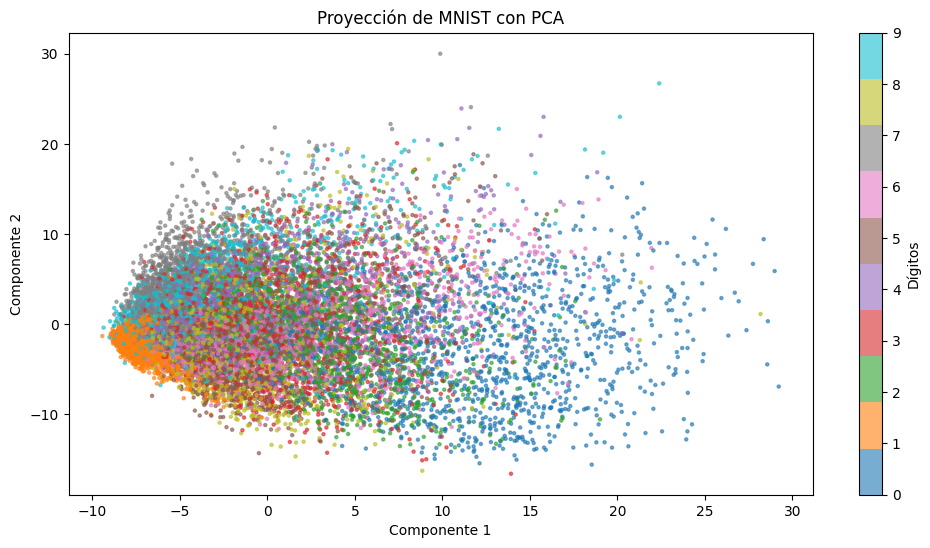

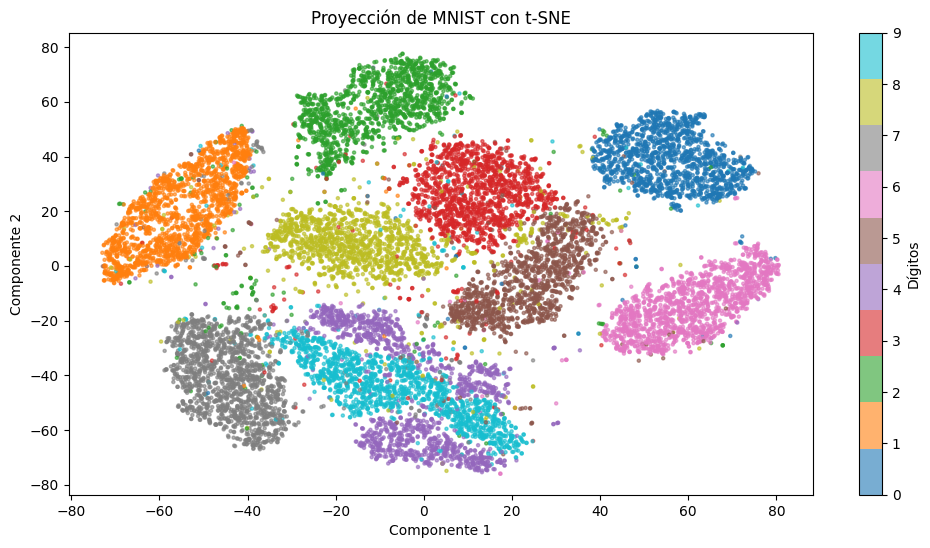

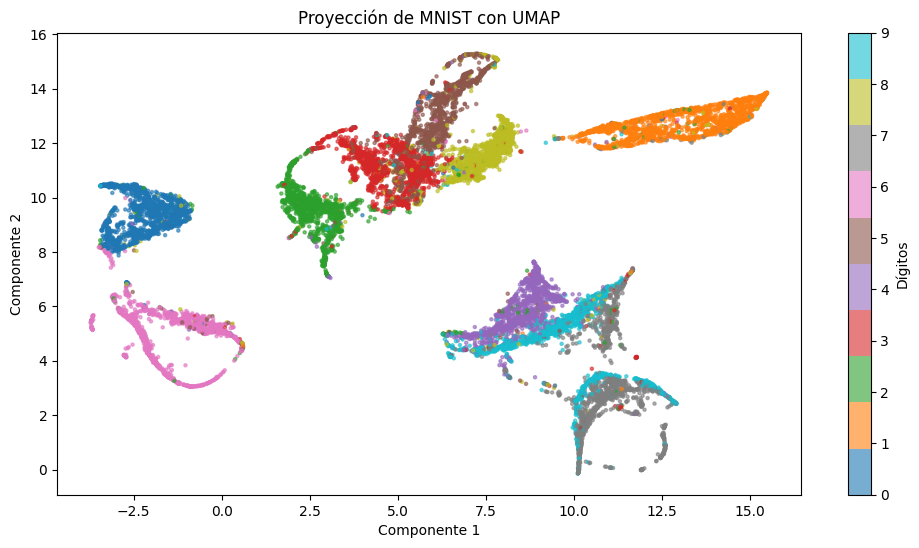

In [ ]:
# Visualización de los espacios
plot_embedding(X_pca, y_subset, "Proyección de MNIST con PCA")
plot_embedding(X_tsne, y_subset, "Proyección de MNIST con t-SNE")
plot_embedding(X_umap, y_subset, "Proyección de MNIST con UMAP")

# 2

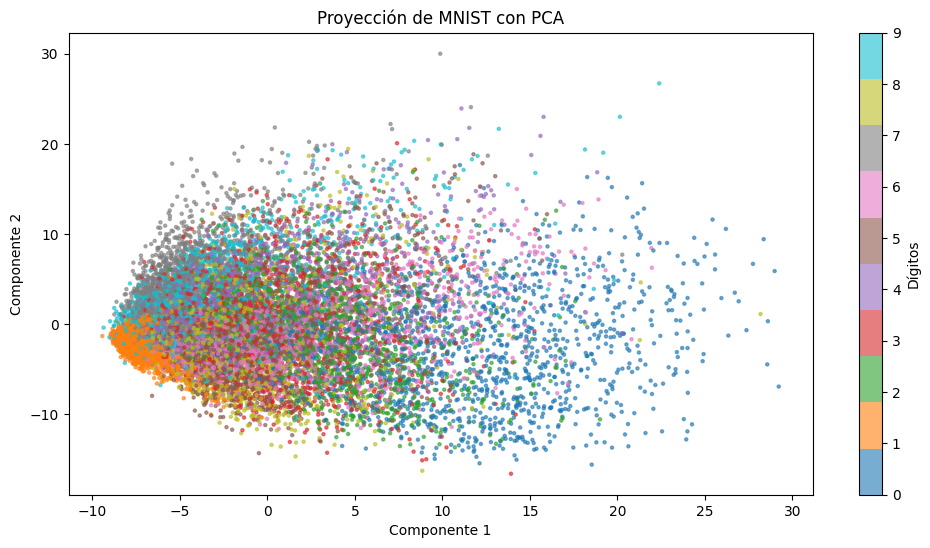

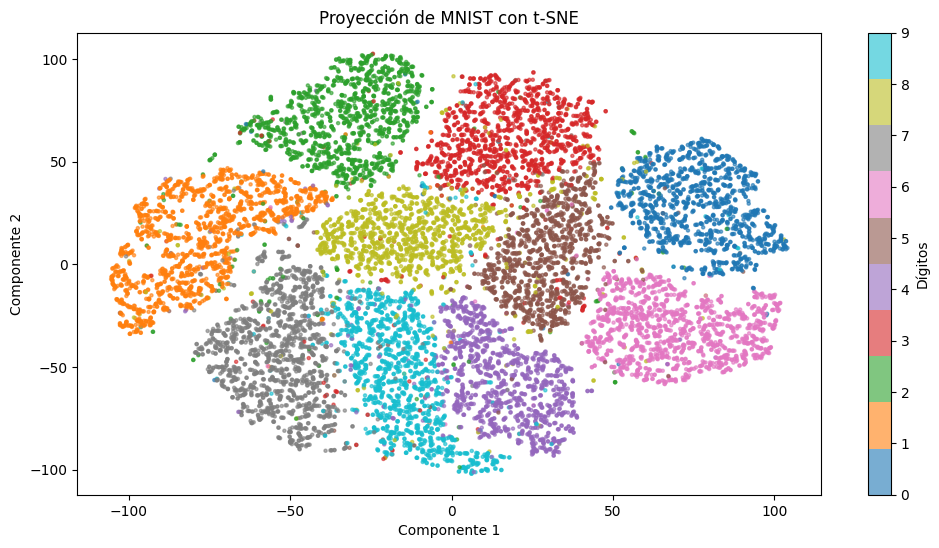

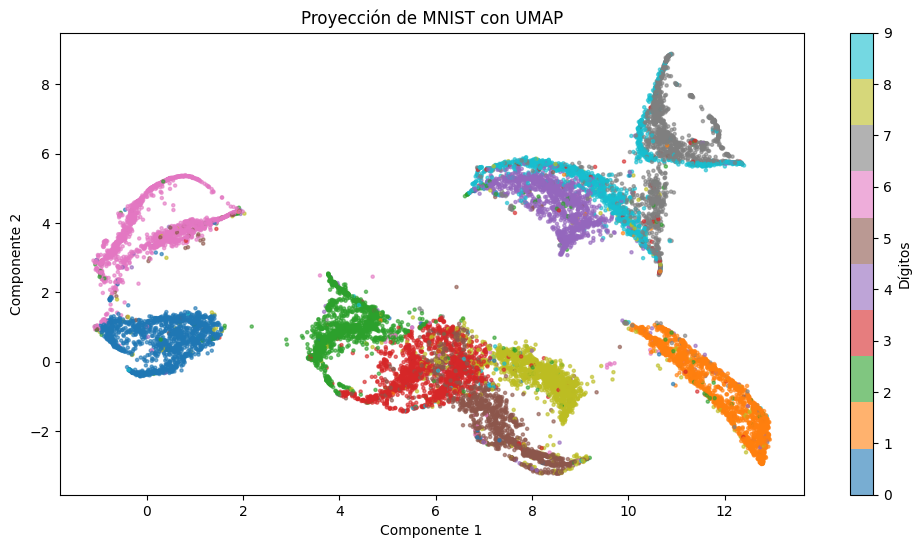

In [ ]:
plot_embedding(X_pca, y_subset, "Proyección de MNIST con PCA")
plot_embedding(X_tsne, y_subset, "Proyección de MNIST con t-SNE")
plot_embedding(X_umap, y_subset, "Proyección de MNIST con UMAP")

# 3

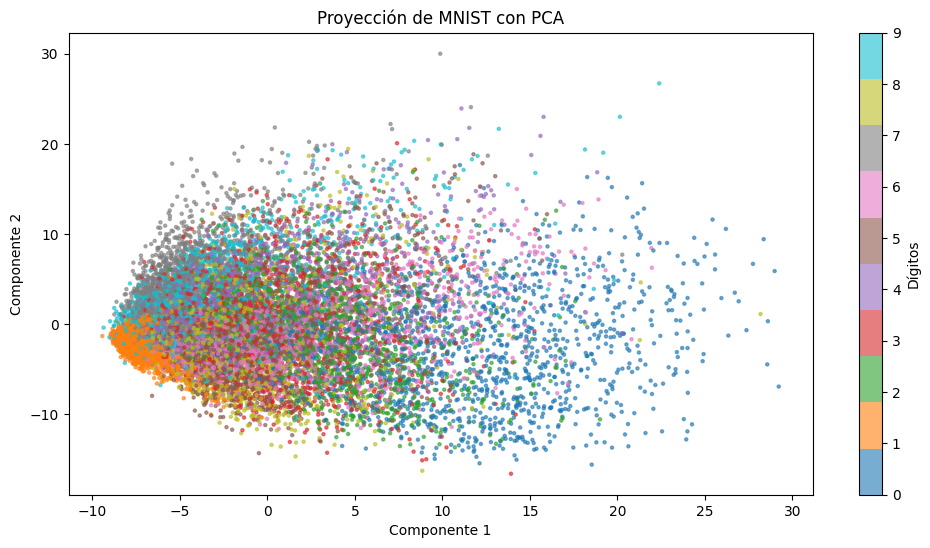

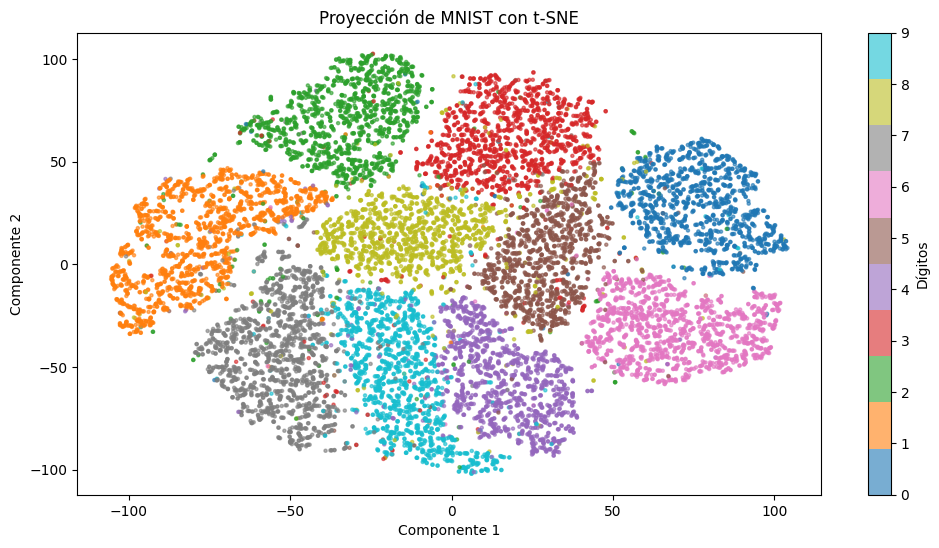

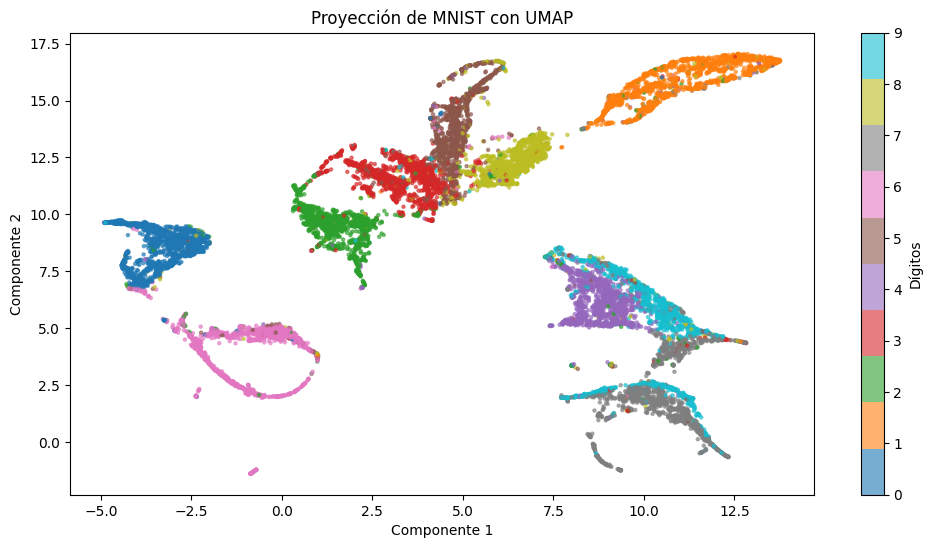

In [ ]:
plot_embedding(X_pca, y_subset, "Proyección de MNIST con PCA")
plot_embedding(X_tsne, y_subset, "Proyección de MNIST con t-SNE")
plot_embedding(X_umap, y_subset, "Proyección de MNIST con UMAP")

# sasa

c:\Users\diego\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\diego\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\diego\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\diego\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\diego\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _wina

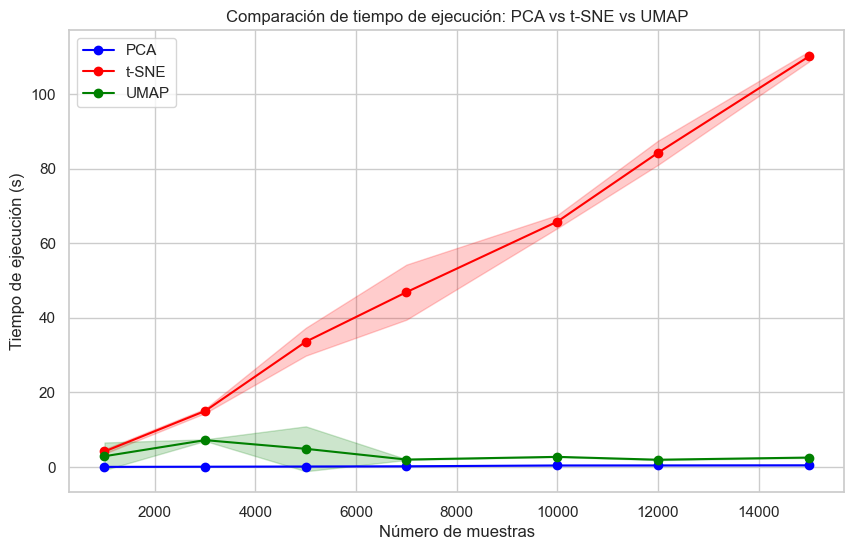

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.utils import shuffle
from sklearn.datasets import fetch_openml

# Cargar dataset MNIST
data = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = data.data, data.target.astype(int)

# Tamaños de muestra a probar
sample_sizes = [1000, 3000, 5000, 7000, 10000, 12000, 15000]
n_iter = 5  # Número de iteraciones por cada tamaño

# Diccionario para almacenar tiempos
time_results = {"PCA": [], "t-SNE": [], "UMAP": []}

for n in sample_sizes:
    pca_times, tsne_times, umap_times = [], [], []
    
    for _ in range(n_iter):
        X_subset, _ = shuffle(X, y, random_state=None, n_samples=n)
        
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_subset)

        # PCA
        start = time.time()
        PCA(n_components=2).fit_transform(X_scaled)
        pca_times.append(time.time() - start)
        
        # t-SNE
        start = time.time()
        TSNE(n_components=2, perplexity=10).fit_transform(X_subset)
        tsne_times.append(time.time() - start)
        
        # UMAP
        start = time.time()
        umap.UMAP(n_components=2, min_dist=0.005,n_neighbors=10).fit_transform(X_subset)
        umap_times.append(time.time() - start)
    
    time_results["PCA"].append((np.mean(pca_times), np.std(pca_times)))
    time_results["t-SNE"].append((np.mean(tsne_times), np.std(tsne_times)))
    time_results["UMAP"].append((np.mean(umap_times), np.std(umap_times)))

# Graficar resultados
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

for method, color in zip(["PCA", "t-SNE", "UMAP"], ["blue", "red", "green"]):
    means, stds = zip(*time_results[method])
    plt.plot(sample_sizes, means, label=method, color=color, marker='o')
    plt.fill_between(sample_sizes, np.array(means) - np.array(stds), np.array(means) + np.array(stds),
                     color=color, alpha=0.2)

plt.xlabel("Número de muestras")
plt.ylabel("Tiempo de ejecución (s)")
plt.legend()
plt.title("Comparación de tiempo de ejecución: PCA vs t-SNE vs UMAP")
plt.show()


In [ ]:
import pandas as pd

df_results = pd.DataFrame({
    "Sample Size": sample_sizes,
    "PCA Mean": [x[0] for x in time_results["PCA"]],
    "PCA Std": [x[1] for x in time_results["PCA"]],
    "t-SNE Mean": [x[0] for x in time_results["t-SNE"]],
    "t-SNE Std": [x[1] for x in time_results["t-SNE"]],
    "UMAP Mean": [x[0] for x in time_results["UMAP"]],
    "UMAP Std": [x[1] for x in time_results["UMAP"]]
})

# Graficar resultados
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

for method, color in zip(["PCA", "t-SNE", "UMAP"], ["blue", "red", "green"]):
    means, stds = zip(*time_results[method])
    plt.plot(sample_sizes, means, label=method, color=color, marker='o')
    plt.fill_between(sample_sizes, np.array(means) - np.array(stds), np.array(means) + np.array(stds),
                     color=color, alpha=0.2)

plt.xlabel("Número de muestras")
plt.ylabel("Tiempo de ejecución (s)")
plt.legend()
plt.title("Comparación de tiempo de ejecución: PCA vs t-SNE vs UMAP")
plt.show()

# Mostrar DataFrame
print(df_results)

NameError: name 'pd' is not defined